In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import stat
from scipy.stats import iqr

# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

from sklearn import model_selection

from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

import re

from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
# Metrics for measuring our fit
from sklearn.metrics import mean_squared_error, accuracy_score

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("dataset.csv")

In [3]:
train.head()

Gender    Age   Debt  Married  BankCustomer     Industry Ethnicity  \
0       1  30.83  0.000        1             1  Industrials     White   
1       0  58.67  4.460        1             1    Materials     Black   
2       0  24.50  0.500        1             1    Materials     Black   
3       1  27.83  1.540        1             1  Industrials     White   
4       1  20.17  5.625        1             1  Industrials     White   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

        Citizen  ZipCode  Income  Approved  
0       ByBirth      202       0         1  
1       ByBirth       43     560         1  
2       ByBirth      280     824         1  
3       ByBirth      100       3         1  
4  ByOtherMeans      120       0         1

In [4]:
#missing data in training set
train.isnull().sum().sort_values(ascending = False)

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [5]:
train['Gender'] = train['Gender'].replace({1: 'Male', 0: 'Female'})

In [6]:
# Value counts of the sex column

train['Gender'].value_counts(dropna = False)

Gender
Male      480
Female    210
Name: count, dtype: int64

In [7]:
train[['Gender', 'Approved']].groupby('Gender', as_index = False).mean().sort_values(by = 'Approved', ascending = False)

Gender  Approved
0  Female  0.466667
1    Male  0.435417

In [8]:
train[['BankCustomer', 'Approved']].groupby('BankCustomer', as_index = False).mean().sort_values(by = 'Approved', ascending = False)

BankCustomer  Approved
1             1  0.497154
0             0  0.276074

In [9]:
train[['Employed', 'Approved']].groupby('Employed', as_index = False).mean().sort_values(by = 'Approved', ascending = False)

Employed  Approved
1         1  0.708475
0         0  0.248101

In [10]:
train[['PriorDefault', 'Approved']].groupby('PriorDefault', as_index = False).mean().sort_values(by = 'Approved', ascending = False)

PriorDefault  Approved
1             1  0.786704
0             0  0.069909

In [11]:
train[['Married', 'Approved']].groupby('Married', as_index = False).mean().sort_values(by = 'Approved', ascending = False)

Married  Approved
1        1  0.495238
0        0  0.284848

In [12]:
# mean age of approved loan customers

mean_age = train[train['Approved'] == 1]['Age'].mean()
print(mean_age)

33.68622149837134


In [13]:
# mean age of NOT approved loan customers

mean_age_notapp = train[train['Approved'] == 0]['Age'].mean()
print(mean_age_notapp)

29.77302872062663


In [14]:
# Value counts of the Pclass column

train['Ethnicity'].value_counts(dropna = False)

Ethnicity
White     408
Black     138
Asian      59
Latino     57
Other      28
Name: count, dtype: int64

In [15]:
train[['Ethnicity', 'Approved']].groupby('Ethnicity', as_index = False).mean().sort_values(by = 'Approved', ascending = False)

Ethnicity  Approved
1     Black  0.630435
3     Other  0.500000
4     White  0.424020
0     Asian  0.423729
2    Latino  0.140351

In [16]:
train[['DriversLicense', 'Approved']].groupby('DriversLicense', as_index = False).mean().sort_values(by = 'Approved', ascending = False)

DriversLicense  Approved
1               1  0.462025
0               0  0.430481

In [17]:
# Value counts of the Pclass column

train['Citizen'].value_counts(dropna = False)

Citizen
ByBirth         625
ByOtherMeans     57
Temporary         8
Name: count, dtype: int64

In [18]:
# Value counts of the Pclass column

train['Industry'].value_counts(dropna = False)

Industry
Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: count, dtype: int64

In [19]:
grouped = train[['Industry', 'Approved']].groupby('Industry', as_index=False).mean().sort_values(by='Approved', ascending=False)

# Step 2: Calculate the number of people working in each industry
industry_counts = train['Industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Count']

# Step 3: Merge the mean approval rates with the counts
grouped_with_counts = pd.merge(grouped, industry_counts, on='Industry')

# Display the result
print(grouped_with_counts)

                 Industry  Approved  Count
0               Utilities  0.842105     38
1   InformationTechnology  0.707317     41
2               Transport  0.666667      3
3               Materials  0.653846     78
4               Education  0.560000     25
5             Industrials  0.515625     64
6                  Energy  0.452055    146
7   CommunicationServices  0.421053     38
8         ConsumerStaples  0.351852     54
9                Research  0.300000     10
10             Financials  0.274510     51
11  ConsumerDiscretionary  0.237288     59
12            Real Estate  0.233333     30
13             Healthcare  0.132075     53


In [20]:
# mean debt of approved clients

mean_debt = train[train['Approved'] == 1]['Debt'].mean()
print(mean_debt)

5.9049511400651475


In [21]:
# mean debt of NOT approved clients

mean_debt_no = train[train['Approved'] == 0]['Debt'].mean()
print(mean_debt_no)

3.839947780678851


In [22]:
# mean years employed of approved clients

mean_emp_yrs = train[train['Approved'] == 1]['YearsEmployed'].mean()
print(mean_emp_yrs)

3.427899022801302


In [23]:
# mean years employed of approved clients

mean_emp_yrs_no = train[train['Approved'] == 0]['YearsEmployed'].mean()
print(mean_emp_yrs_no)

1.2579242819843344


In [24]:
train['Gender'] = train['Gender'].replace({'Male': 1, 'Female':0 })


In [25]:
train['Age'] = train['Age'].round().astype(int)

In [26]:
train.head()

Gender  Age   Debt  Married  BankCustomer     Industry Ethnicity  \
0       1   31  0.000        1             1  Industrials     White   
1       0   59  4.460        1             1    Materials     Black   
2       0   24  0.500        1             1    Materials     Black   
3       1   28  1.540        1             1  Industrials     White   
4       1   20  5.625        1             1  Industrials     White   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

        Citizen  ZipCode  Income  Approved  
0       ByBirth      202       0         1  
1       ByBirth       43     560         1  
2       ByBirth      280     824         1  
3       ByBirth      100       3         1  
4  ByOtherMeans      120       0         1

## Outlier Treatment

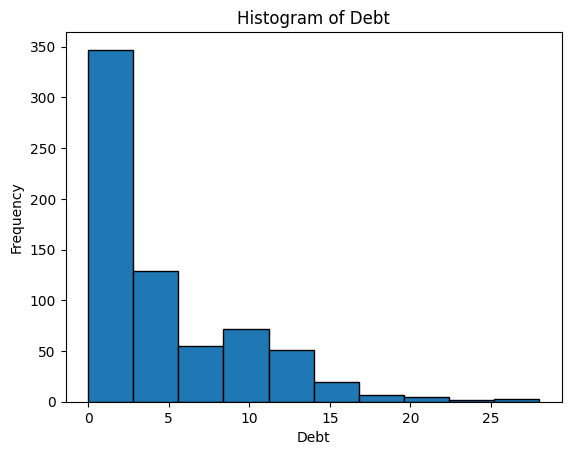

In [27]:
# Plot histogram of the Debt column
plt.hist(train['Debt'], bins=10, edgecolor='black')
plt.title('Histogram of Debt')
plt.xlabel('Debt')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Debt'>

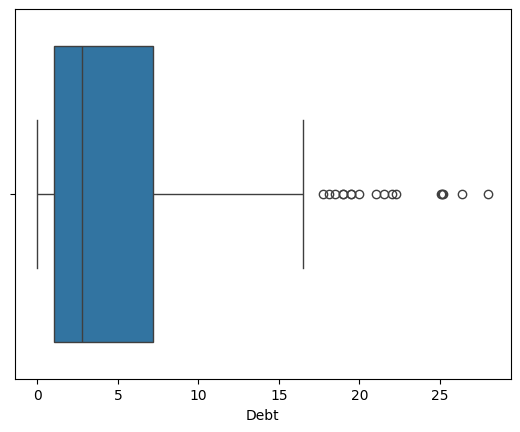

In [28]:
sns.boxplot(x="Debt", data=train)

In [29]:
print('skewness value of Debt: ',train['Debt'].skew())

skewness value of Debt:  1.4888131246649208


## Inter Quartile Range

The interquartile range is a measure of statistical dispersion and is calculated as the difference between 75th and 25th percentiles. the Quartiles divide the data set into four equal parts. The values that separate parts are called the first, second, and third quartiles.

In [30]:
Q1=train['Debt'].quantile(0.25)
Q3=train['Debt'].quantile(0.75)
IQR=Q3-Q1

In [31]:
print(IQR)

6.2075


In [32]:
whisker_width = 1.5
Fare_outliers = train[(train['Debt'] < Q1 - whisker_width*IQR) | (train['Debt'] > Q3 + whisker_width*IQR)]
Fare_outliers.head()

Gender  Age    Debt  Married  BankCustomer     Industry Ethnicity  \
27        1   57  18.500        1             1  Real Estate     Asian   
44        1   56  28.000        0             0       Energy     White   
69        1   35  25.125        1             1    Utilities     Black   
80        1   50  19.000        1             1   Healthcare    Latino   
183       0   57  19.500        1             1       Energy     White   

     YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
27          15.000             1         1           17               1   
44          28.500             1         1           40               0   
69           1.625             1         1            1               1   
80           0.000             1         1            1               0   
183          5.500             1         1            7               0   

     Citizen  ZipCode  Income  Approved  
27   ByBirth        0       0         1  
44   ByBirth        0      15         1  
69   ByBirth      515     500         1  
80   ByBirth       94       0         0  
183  ByBirth        0    3000         1

in this quantile-based technique, we will do the flooring(e.g 25th percentile) for the lower values and capping(e.g for the 75th percentile) for the higher values. These percentile values will be used for the quantile-based flooring and capping.

the code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘Fare’ variable.

In [33]:
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
train['Debt']=np.where(train['Debt']>upper_whisker,upper_whisker,np.where(train['Debt']<lower_whisker,lower_whisker,train['Debt']))

<Axes: xlabel='Debt'>

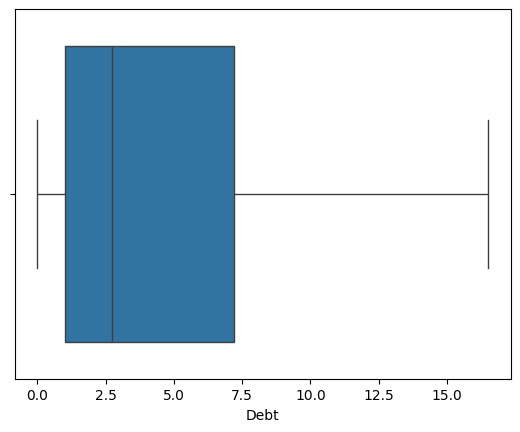

In [34]:
sns.boxplot(x="Debt", data=train)


<Axes: >

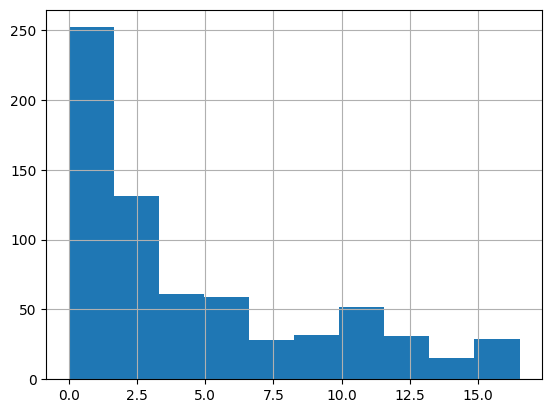

In [35]:
train['Debt'].hist()

In [36]:
print('skewness value of Debt: ',train['Debt'].skew())

skewness value of Debt:  1.0490927524045677


## Further Outlier Treatment

In [37]:
# Check for non-positive values in the Debt column
non_positive_debt = train['Debt'] <= 0

# Determine if any non-positive values exist
has_non_positive_debt = non_positive_debt.any()

# Display the result
print("Are there any non-positive values in the Debt column?", has_non_positive_debt)

# If there are non-positive values, display them
if has_non_positive_debt:
    print("Non-positive Debt values:")
    print(train[non_positive_debt])

Are there any non-positive values in the Debt column? True
Non-positive Debt values:
     Gender  Age  Debt  Married  BankCustomer               Industry  \
0         1   31   0.0        1             1            Industrials   
56        1   23   0.0        1             1  InformationTechnology   
171       1   41   0.0        1             1                 Energy   
206       0   72   0.0        1             1                 Energy   
257       1   20   0.0        1             1            Real Estate   
261       0   52   0.0        0             0             Healthcare   
270       1   38   0.0        1             1                 Energy   
314       1   16   0.0        0             0        ConsumerStaples   
318       1   19   0.0        0             0  CommunicationServices   
330       1   20   0.0        1             1                 Energy   
387       1   21   0.0        1             1                 Energy   
435       1   19   0.0        0             0      

In [38]:
# Add a small constant to handle zero values
train['Debt'] = train['Debt'] + 1e-6

In [39]:
# Check for non-positive values in the Debt column
non_positive_debt = train['Debt'] <= 0

# Determine if any non-positive values exist
has_non_positive_debt = non_positive_debt.any()

# Display the result
print("Are there any non-positive values in the Debt column?", has_non_positive_debt)

# If there are non-positive values, display them
if has_non_positive_debt:
    print("Non-positive Debt values:")
    print(train[non_positive_debt])

Are there any non-positive values in the Debt column? False


In [40]:
from scipy import stats

train['debt_transformed'], fitted_lambda = stats.yeojohnson(train['Debt'])

In [41]:
print('skewness value of Debt: ',train['debt_transformed'].skew())

skewness value of Debt:  0.028237711057956676


In [42]:
train['debt_transformed'].hist()

<Axes: >

Based on the visual appearance of this histogram, it seems that the skewness issue has been addressed reasonably well, likely through a combination of transformations and other techniques.

In [43]:
train.head()

Gender  Age      Debt  Married  BankCustomer     Industry Ethnicity  \
0       1   31  0.000001        1             1  Industrials     White   
1       0   59  4.460001        1             1    Materials     Black   
2       0   24  0.500001        1             1    Materials     Black   
3       1   28  1.540001        1             1  Industrials     White   
4       1   20  5.625001        1             1  Industrials     White   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

        Citizen  ZipCode  Income  Approved  debt_transformed  
0       ByBirth      202       0         1      9.999995e-07  
1       ByBirth       43     560         1      1.578364e+00  
2       ByBirth      280     824         1      3.984163e-01  
3       ByBirth      100       3         1      8.954634e-01  
4  ByOtherMeans      120       0         1      1.743887e+00

In [44]:
train = train.drop('Debt', axis = 1)

In [45]:
# Group the data by 'Approved'
grouped_data = train.groupby('Approved')['debt_transformed']

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*[group for name, group in grouped_data])

# Print the results
print("F-Statistic:", f_statistic)
print("p-value:", p_value)

F-Statistic: 26.226321048229345
p-value: 3.946820312795532e-07


The ANOVA test results indicate a significant difference in debt values between the different approval statuses. The F-statistic is approximately 26.23, and the p-value is approximately 3.95e-07 (or 0.0000003947).

This low p-value suggests that the observed difference in debt values between the approval statuses is unlikely to have occurred by random chance alone, assuming the null hypothesis (that there is no difference in debt values between approval statuses) is true. Therefore, we reject the null hypothesis and conclude that there is a statistically significant difference in debt values based on loan approval status.

In [46]:
# Group the data by 'Approved'
grouped_data = train.groupby('Approved')['YearsEmployed']

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*[group for name, group in grouped_data])

# Print the results
print("F-Statistic:", f_statistic)
print("p-value:", p_value)

F-Statistic: 79.84887878240947
p-value: 3.671053740160496e-18


This low p-value suggests that the observed difference in years employed between the approval statuses is highly unlikely to have occurred by random chance alone, assuming the null hypothesis (that there is no difference in years employed between approval statuses) is true. Therefore, we reject the null hypothesis and conclude that there is a statistically significant difference in years employed based on loan approval status.

In [47]:
train = train.drop('ZipCode', axis = 1)

In [48]:
# Group the data by 'Approved'
grouped_data = train.groupby('Approved')['Age']

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*[group for name, group in grouped_data])

# Print the results
print("F-Statistic:", f_statistic)
print("p-value:", p_value)

F-Statistic: 18.73527306739061
p-value: 1.724805927513851e-05


This low p-value suggests that the observed difference in age between the approval statuses is highly unlikely to have occurred by random chance alone, assuming the null hypothesis (that there is no difference in age between approval statuses) is true. Therefore, we reject the null hypothesis and conclude that there is a statistically significant difference in age based on loan approval status.

In [49]:
category=['Gender','Married','BankCustomer','Ethnicity','PriorDefault','Employed','DriversLicense','Citizen','Approved','Industry']

Gender:


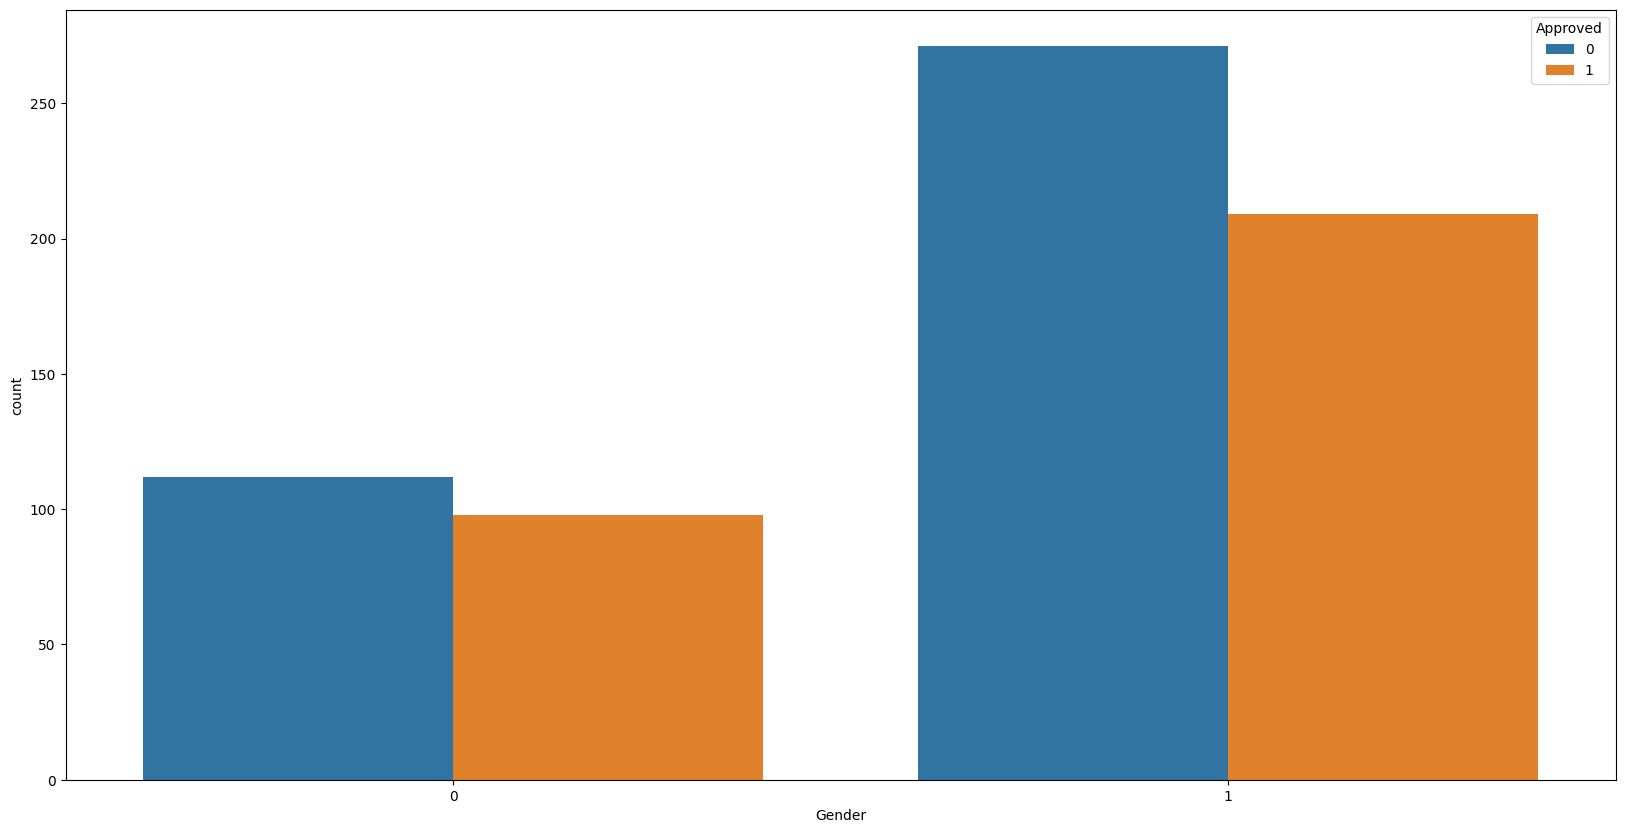

'Gender' is a 'bad Predictor'
p_val = 0.44723087514133186

Married:


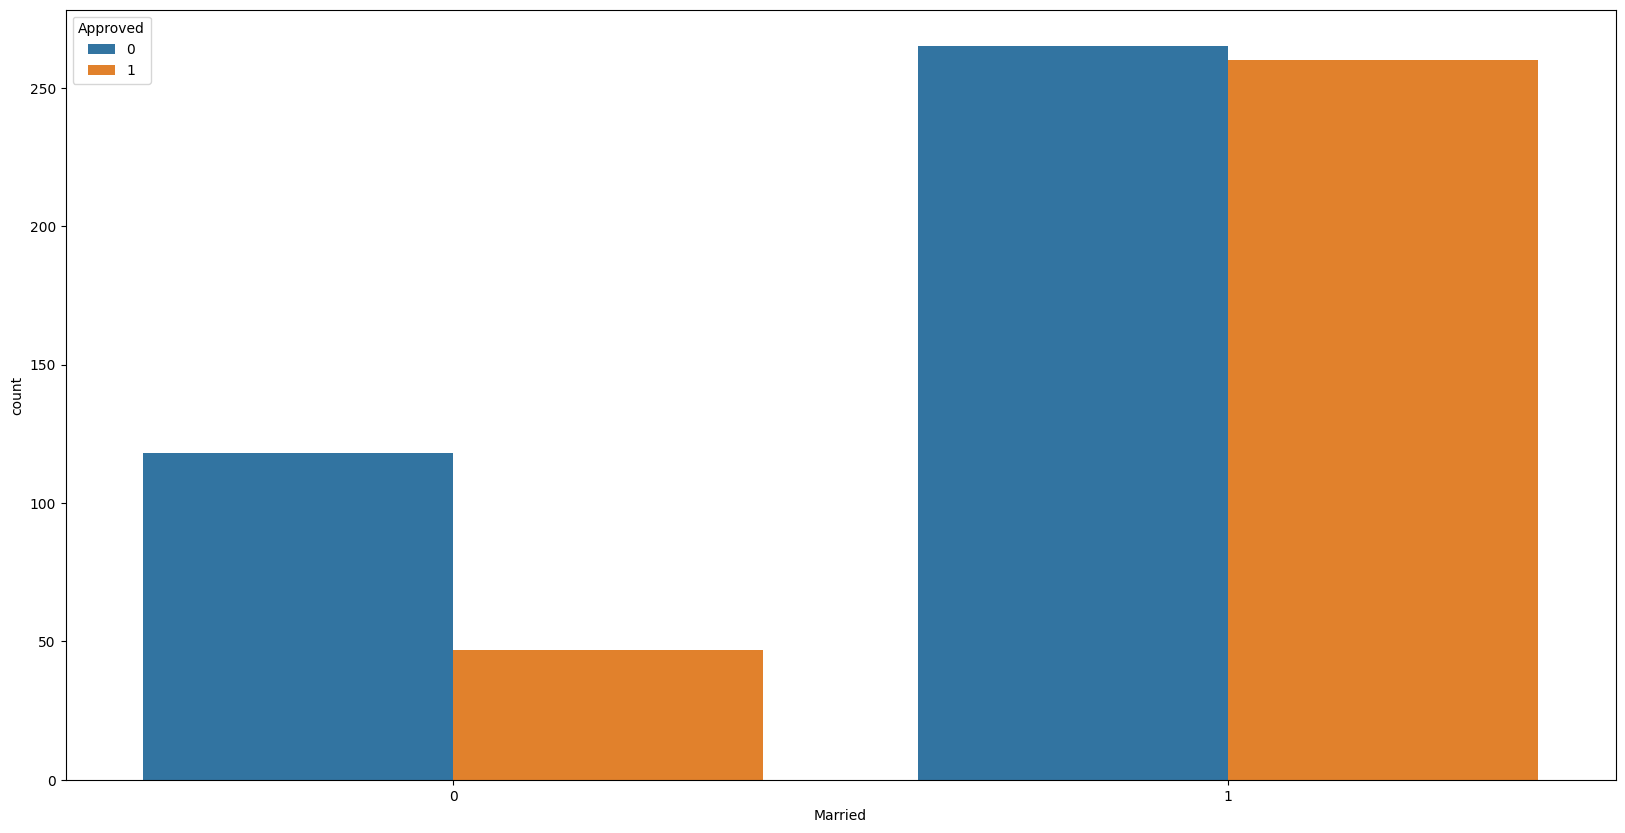

'Married' is a 'Good Predictor'
p_val = 2.100231920165588e-06

BankCustomer:


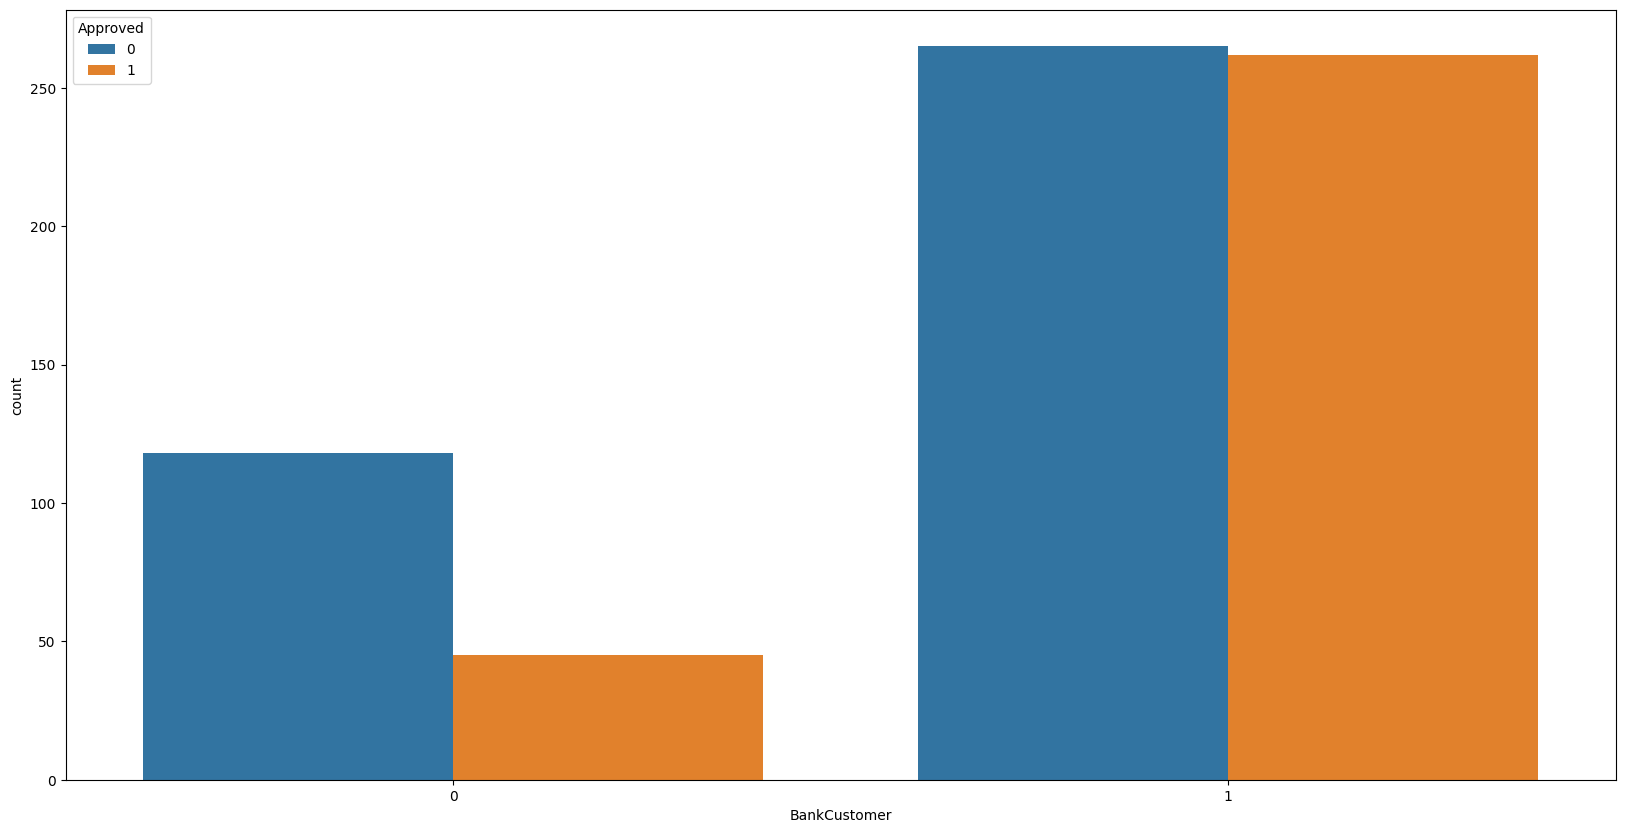

'BankCustomer' is a 'Good Predictor'
p_val = 6.91661320541803e-07

Ethnicity:


'Ethnicity' is a 'Good Predictor'
p_val = 1.823665654934685e-08

PriorDefault:


'PriorDefault' is a 'Good Predictor'
p_val = 7.298530125411298e-80

Employed:


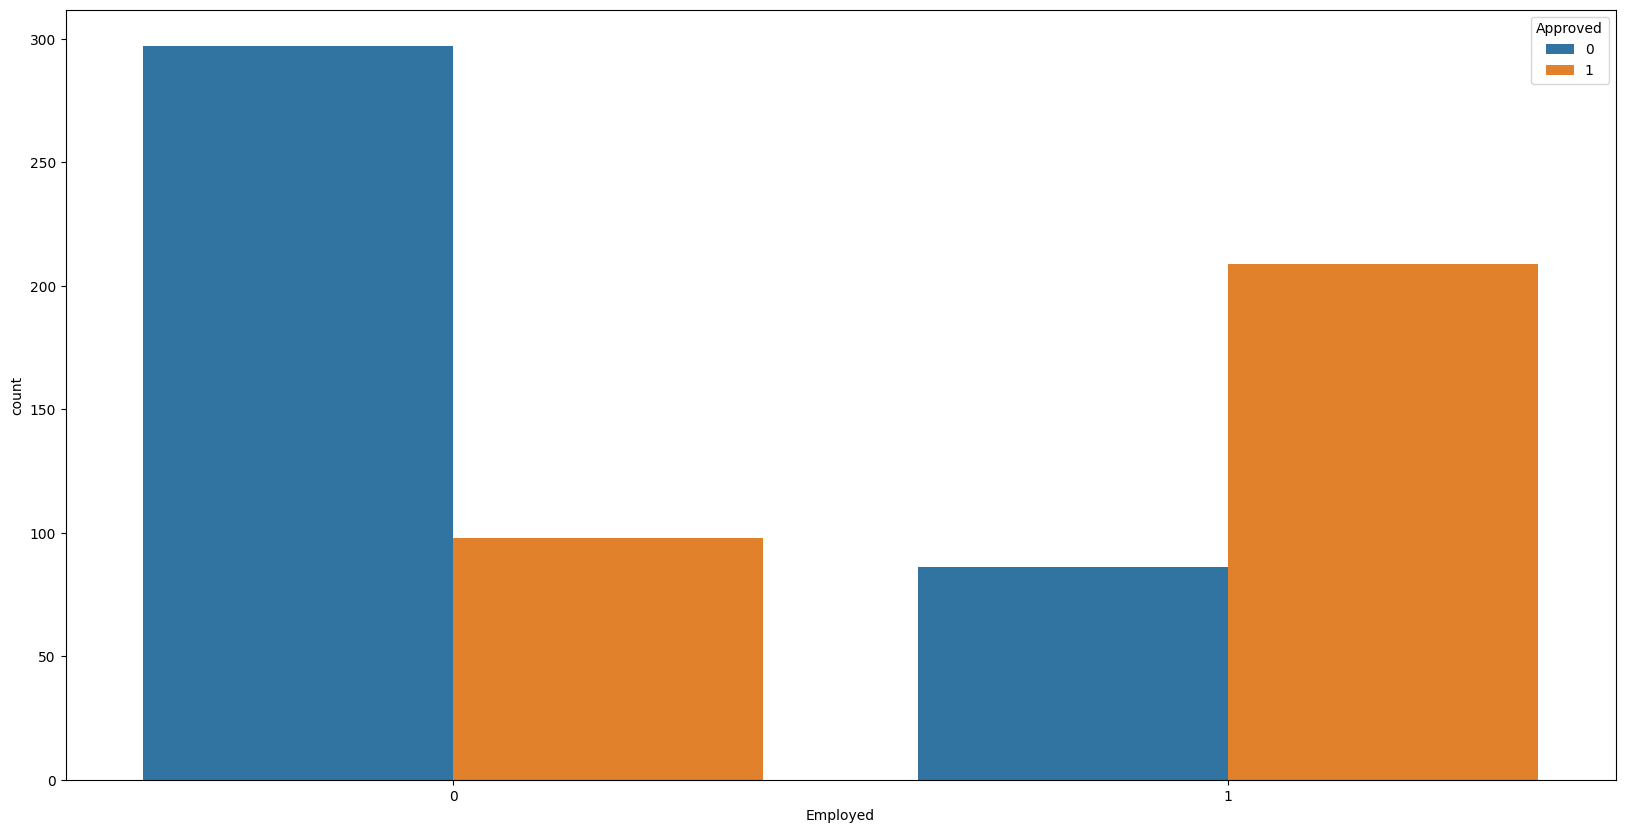

'Employed' is a 'Good Predictor'
p_val = 2.227269345312281e-33

DriversLicense:


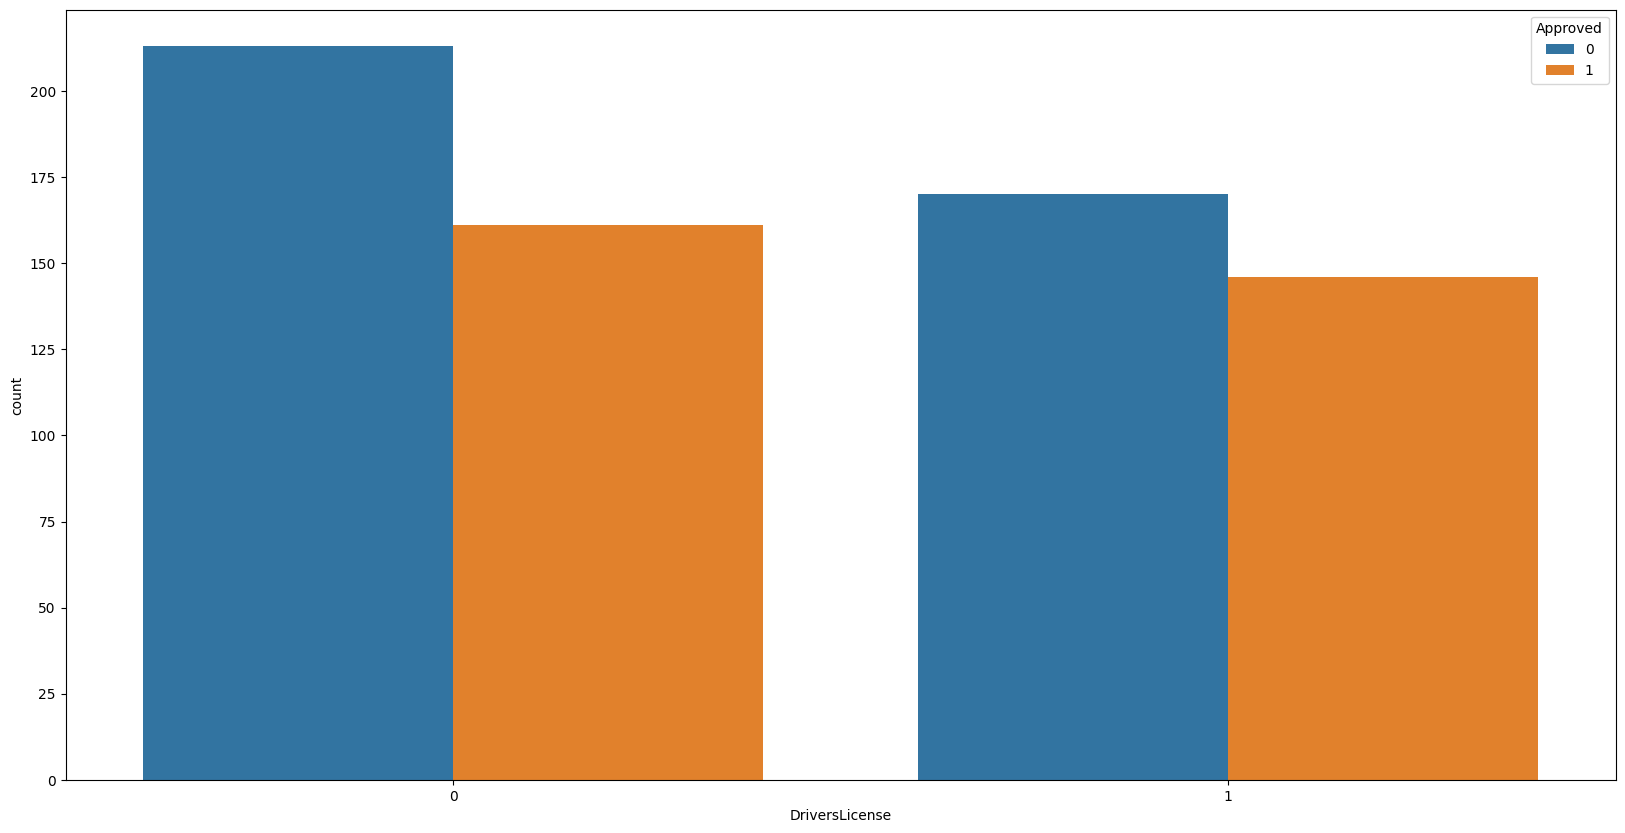

'DriversLicense' is a 'bad Predictor'
p_val = 0.4061341323141693

Citizen:


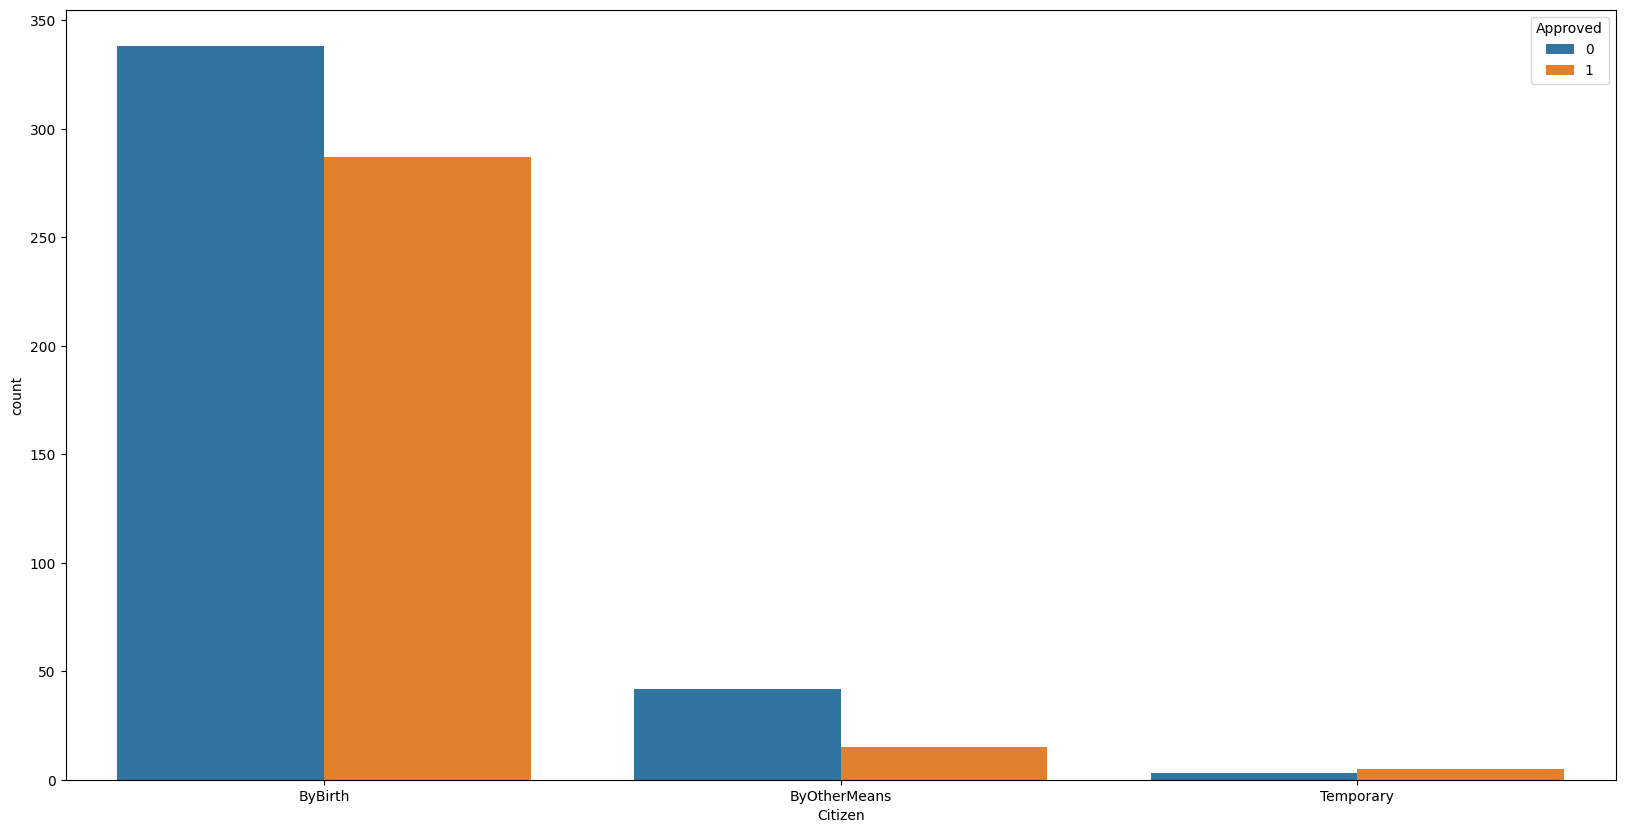

'Citizen' is a 'Good Predictor'
p_val = 0.010094291370456362

Approved:


'Approved' is a 'Good Predictor'
p_val = 4.469841378183071e-152

Industry:


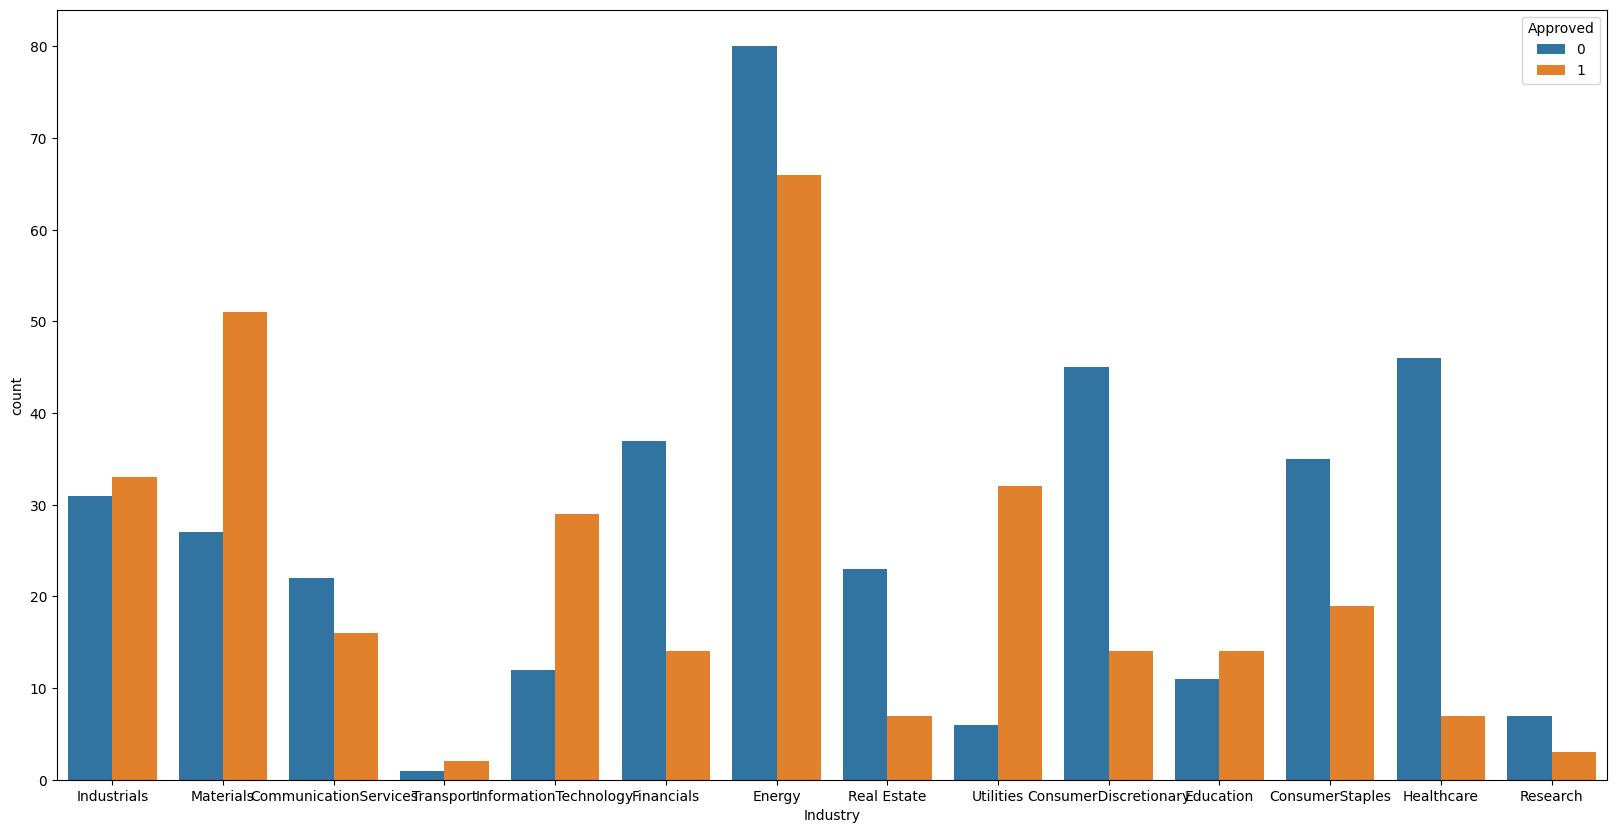

'Industry' is a 'Good Predictor'
p_val = 3.502987066102042e-15



In [50]:
!pip install colorama

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import colorama
from colorama import Fore

for i in category:
    print(i+":")
    plt.figure(figsize=(20,10))
    sns.countplot(x=i,data=train,hue='Approved')
    plt.show()
    a=np.array(pd.crosstab(train.Approved,train[i]))
    (stats,p,dof,_)=chi2_contingency(a,correction=False)
    if p>0.05:
        print(Fore.RED +"'{}' is a 'bad Predictor'".format(i))
        print("p_val = {}\n".format(p))
    else:
        print(Fore.GREEN +"'{}' is a 'Good Predictor'".format(i))
        print("p_val = {}\n".format(p))


In [51]:
train = train.drop('Gender', axis = 1)

In [52]:
train = train.drop('DriversLicense', axis = 1)

In [53]:
train = train.drop('YearsEmployed', axis = 1)

In [54]:
train = train.drop('debt_transformed', axis = 1)

In [55]:
train.head()

Age  Married  BankCustomer     Industry Ethnicity  PriorDefault  Employed  \
0   31        1             1  Industrials     White             1         1   
1   59        1             1    Materials     Black             1         1   
2   24        1             1    Materials     Black             1         0   
3   28        1             1  Industrials     White             1         1   
4   20        1             1  Industrials     White             1         0   

   CreditScore       Citizen  Income  Approved  
0            1       ByBirth       0         1  
1            6       ByBirth     560         1  
2            0       ByBirth     824         1  
3            5       ByBirth       3         1  
4            0  ByOtherMeans       0         1

We're removing debt_transformed because most credit card issuing organizations only look at your credit score, they're not really bothered about previous credit card debt as long as a decent credit score is achieved by the client

We remove gender and driver's license because according to the chi-square test they're not good predictors of being able to get a credit card or not

We remove year_employed because credit card issuing organizations are mostly concerned about if the given applicant is currently holding a job or not and then how much salary is said person earning per anum, usually history of employment is not considered.

I think we should also remove 'Ethnicity' because, I have a hunch that the given model after training might develop a bias for certain ethnicities such as Latino who on avg have very low credit card approval status i.e making our model racist which we obviously do not approve of.


In [56]:
train = train.drop('Ethnicity', axis = 1)

I think the same applies to 'Industry' because we noticed that applicants working in the healthcare and real estate indsutry seem to have the worst approval history.

This may be due do the poor credit history or other factors, and not necessarily because of them being in said indsutries which the machine learning model might pick up and create a bias.

I anyway don't think real credit card issuing organizations care about the industry applicants work in, so this might be a good move.

In [57]:
train = train.drop('Industry', axis = 1)

In [58]:
train = pd.get_dummies(train, columns = ['Citizen'])

In [59]:
train['Citizen_ByBirth'] = train['Citizen_ByBirth'].map({True: 1, False: 0})
train['Citizen_ByOtherMeans'] = train['Citizen_ByOtherMeans'].map({True: 1, False: 0})
train['Citizen_Temporary'] = train['Citizen_Temporary'].map({True: 1, False: 0})

In [60]:
min_credit_score = train['CreditScore'].min()
max_credit_score = train['CreditScore'].max()

print("Range of Credit Scores in the dataset:")
print("Minimum Credit Score:", min_credit_score)
print("Maximum Credit Score:", max_credit_score)

Range of Credit Scores in the dataset:
Minimum Credit Score: 0
Maximum Credit Score: 67


In [61]:
def bin_credit_score(credit_score):
    if credit_score >= 0 and credit_score <= 16:
        return 'Very Poor Credit'
    elif credit_score >= 17 and credit_score <= 33:
        return 'Poor Credit'
    elif credit_score >= 34 and credit_score <= 50:
        return 'Fair Credit'
    elif credit_score >= 51 and credit_score <= 67:
        return 'Good Credit'
    else:
        return 'Invalid Credit Score'

# Apply the binning function to the 'CreditScore' column
train['CreditScore_bin'] = train['CreditScore'].apply(bin_credit_score)

In [62]:
train.head()

Age  Married  BankCustomer  PriorDefault  Employed  CreditScore  Income  \
0   31        1             1             1         1            1       0   
1   59        1             1             1         1            6     560   
2   24        1             1             1         0            0     824   
3   28        1             1             1         1            5       3   
4   20        1             1             1         0            0       0   

   Approved  Citizen_ByBirth  Citizen_ByOtherMeans  Citizen_Temporary  \
0         1                1                     0                  0   
1         1                1                     0                  0   
2         1                1                     0                  0   
3         1                1                     0                  0   
4         1                0                     1                  0   

    CreditScore_bin  
0  Very Poor Credit  
1  Very Poor Credit  
2  Very Poor Credit  
3  Very Poor Credit  
4  Very Poor Credit

In [63]:
credit_score_bin_dummies = pd.get_dummies(train['CreditScore_bin'], prefix='CreditScore_bin')

# Concatenate the dummy variables with the original DataFrame
train = pd.concat([train, credit_score_bin_dummies], axis=1)

In [64]:
train['CreditScore_bin_Fair Credit'] = train['CreditScore_bin_Fair Credit'].map({True: 1, False: 0})
train['CreditScore_bin_Good Credit'] = train['CreditScore_bin_Good Credit'].map({True: 1, False: 0})
train['CreditScore_bin_Poor Credit'] = train['CreditScore_bin_Poor Credit'].map({True: 1, False: 0})
train['CreditScore_bin_Very Poor Credit'] = train['CreditScore_bin_Very Poor Credit'].map({True: 1, False: 0})

In [65]:
train = train.drop('CreditScore_bin', axis = 1)

In [66]:
new_column_names = {
    'CreditScore_bin_Fair Credit': 'FairCredit',
    'CreditScore_bin_Good Credit': 'GoodCredit',
    'CreditScore_bin_Poor Credit': 'PoorCredit',
    'CreditScore_bin_Very Poor Credit': 'VeryPoorCredit'
    # Add more mappings as needed
}

# Rename columns using the rename() method
train.rename(columns=new_column_names, inplace=True)

# Print the updated DataFrame to verify the changes
print(train)

     Age  Married  BankCustomer  PriorDefault  Employed  CreditScore  Income  \
0     31        1             1             1         1            1       0   
1     59        1             1             1         1            6     560   
2     24        1             1             1         0            0     824   
3     28        1             1             1         1            5       3   
4     20        1             1             1         0            0       0   
..   ...      ...           ...           ...       ...          ...     ...   
685   21        0             0             0         0            0       0   
686   23        1             1             0         1            2     394   
687   25        0             0             0         1            1       1   
688   18        1             1             0         0            0     750   
689   35        1             1             0         0            0       0   

     Approved  Citizen_ByBirth  Citizen

In [67]:
train.head()

Age  Married  BankCustomer  PriorDefault  Employed  CreditScore  Income  \
0   31        1             1             1         1            1       0   
1   59        1             1             1         1            6     560   
2   24        1             1             1         0            0     824   
3   28        1             1             1         1            5       3   
4   20        1             1             1         0            0       0   

   Approved  Citizen_ByBirth  Citizen_ByOtherMeans  Citizen_Temporary  \
0         1                1                     0                  0   
1         1                1                     0                  0   
2         1                1                     0                  0   
3         1                1                     0                  0   
4         1                0                     1                  0   

   FairCredit  GoodCredit  PoorCredit  VeryPoorCredit  
0           0           0           0               1  
1           0           0           0               1  
2           0           0           0               1  
3           0           0           0               1  
4           0           0           0               1

In [68]:
train['has_income'] = train['Income'].apply(lambda x: 1 if x > 0 else 0)

## Model Training

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'train' is your DataFrame containing the data
# X contains the features, and y contains the target variable
X = train.drop('Approved', axis=1)  # Features
y = train['Approved']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf_clf.fit(X_train, y_train)

# Predictions on the testing set
rf_y_pred = rf_clf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Additional evaluation metrics
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

Random Forest Accuracy: 0.8623188405797102

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        68
           1       0.89      0.83      0.86        70

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138


Random Forest Confusion Matrix:
[[61  7]
 [12 58]]


1. Accuracy: 0.8623 (86.23%)
2. Precision: Class 0 (0.84), Class 1 (0.89)
3. Recall: Class 0 (0.90), Class 1 (0.83)
4. F1-score: Class 0 (0.87), Class 1 (0.86)
5. Confusion Matrix: [[61 7] [12 58]] - Model correctly classifies 58 instances and misclassifies 12

In [75]:
rf_y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1])

In [76]:
# Create and save csv file

train.to_csv("dataset_new.csv", index = False)

In [77]:
from google.colab import files

# Download the CSV file to your local machine
files.download('dataset_new.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
import joblib

# Save the trained model to a file using joblib
joblib.dump(rf_clf, 'model.pkl')

# Print a message to confirm the model has been saved
print("Model saved as 'model.pkl'")

Model saved as 'model.pkl'


In [79]:
from google.colab import files

# Download the CSV file to your local machine
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>